In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
games=pd.read_csv(r"C:\Users\singa tharun reddy\Desktop\Github projects\Chess opening recommendation system\games.csv")

In [3]:
df=games

In [4]:
df.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   rated           20058 non-null  bool   
 2   created_at      20058 non-null  float64
 3   last_move_at    20058 non-null  float64
 4   turns           20058 non-null  int64  
 5   victory_status  20058 non-null  object 
 6   winner          20058 non-null  object 
 7   increment_code  20058 non-null  object 
 8   white_id        20058 non-null  object 
 9   white_rating    20058 non-null  int64  
 10  black_id        20058 non-null  object 
 11  black_rating    20058 non-null  int64  
 12  moves           20058 non-null  object 
 13  opening_eco     20058 non-null  object 
 14  opening_name    20058 non-null  object 
 15  opening_ply     20058 non-null  int64  
dtypes: bool(1), float64(2), int64(4), object(9)
memory usage: 2.3+ MB


In [6]:
df.shape

(20058, 16)


### <font color=darkblue>**We are going to explore data of 20,000 games and generate strategies for winning a game.**</font>

In [7]:
#As opening palys a important role in winning,I am ignoring data of less frequent openings. 
s=df["opening_name"].value_counts().gt(20)
df=df.loc[df["opening_name"].isin(s[s].index)]

In [8]:
len(df.opening_name.value_counts())#We have 220 different openings.

220

In [9]:
#I am considering rated players data only.
rated=df[(df["rated"]==True)]

In [10]:
#we are dropping non essential columns.
rated.drop(["id","rated","created_at", "last_move_at","white_id","black_id","moves"],axis=1,inplace=True)

In [11]:
#cross checking the data.
rated.head()

,turns,victory_status,winner,increment_code,white_rating,black_rating,opening_eco,opening_name,opening_ply
2,61,mate,white,5+10,1496,1500,C20,King's Pawn Game: Leonardis Variation,3
3,61,mate,white,20+0,1439,1454,D02,Queen's Pawn Game: Zukertort Variation,3
4,95,mate,white,30+3,1523,1469,C41,Philidor Defense,5
8,66,resign,black,15+0,1439,1392,C50,Italian Game: Schilling-Kostic Gambit,6
9,119,mate,white,10+0,1381,1209,B01,Scandinavian Defense: Mieses-Kotroc Variation,4


In [12]:
open_win = rated.groupby('opening_name').winner.value_counts()
open_win = open_win.reset_index(name='wins')
open_win = open_win.sort_values(by='wins', ascending=False)

In [13]:
white_win=open_win[open_win.winner=="white"]
black_win=open_win[open_win.winner=="black"]
draw_win=open_win[open_win.winner=="draw"]


### <font color=darkblue>**1.Top 10 openings for the white to win?**</font>

Text(0.5, 1.0, 'Top 10 openings for the white to win')

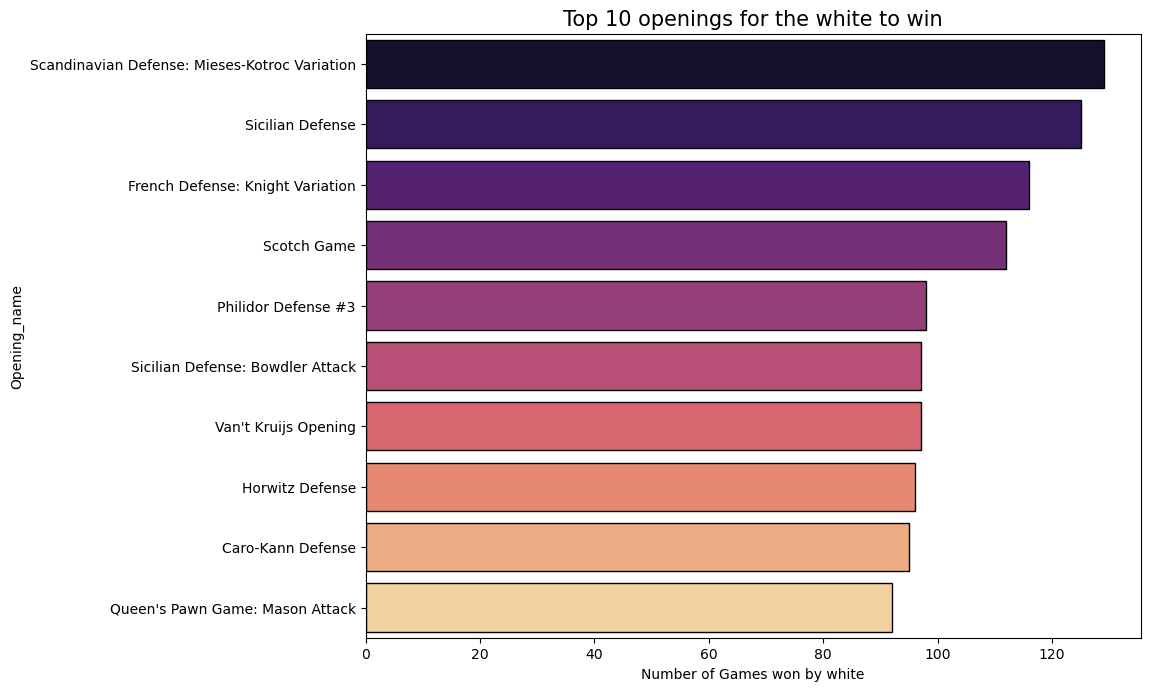

In [14]:
## Creating a  Bar Plot  ##
plt.figure(figsize=(10,8),dpi=100)
plt.title('Top 10 openings for the white to win.')
white_winning_plot = sns.barplot(y=white_win.opening_name[:10],x=white_win.wins[:10], palette = "magma",edgecolor='black')
plt.ylabel("Opening_name", fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Number of Games won by white", fontsize=10)
plt.title("Top 10 openings for the white to win",fontsize=15)

#### <font color=darkgreen>**Observation:**</font> <font color=black>**Scandinavian Defense: Mieses-Kotroc Variation Opening</font> <font color=black>**has highest probability of winning for white.</font>

### <font color=darkblue>**2.Top 10 openings for the Black to win?**</font>

Text(0.5, 1.0, 'Top 10 openings for the black to win')

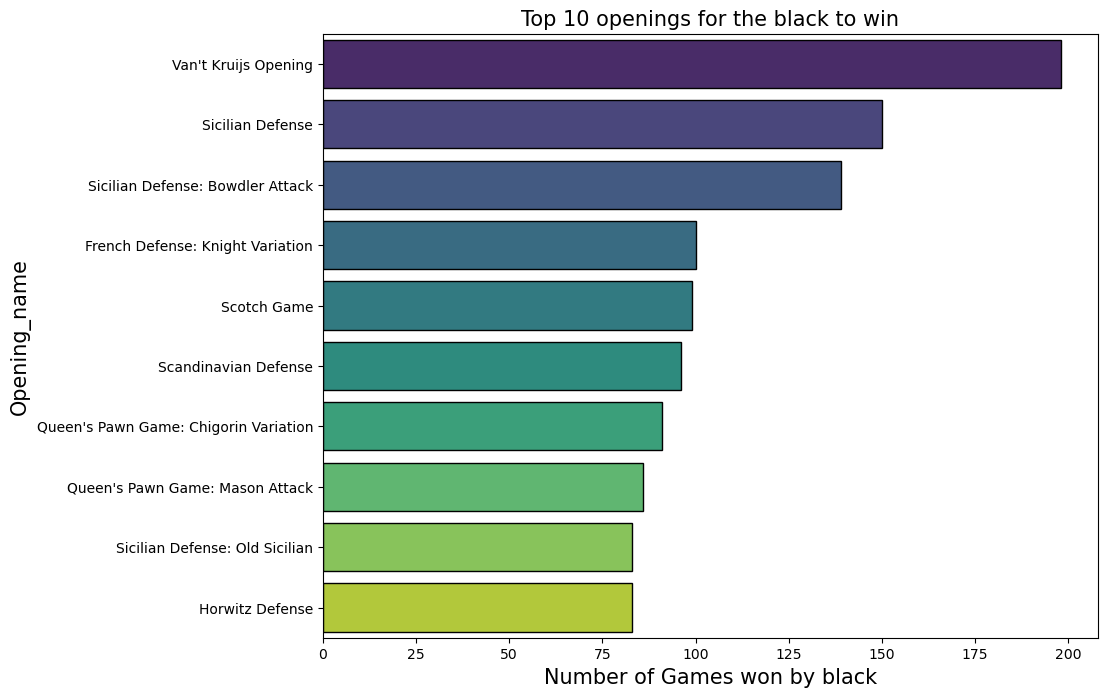

In [15]:
## Creating a  Bar Plot  ##
black_win = black_win.sort_values(by='wins', ascending=False)
plt.figure(figsize=(10,8),dpi=100)
plt.title('Least 10 openings for the black to win.')
white_winning_plot = sns.barplot(y=black_win.opening_name[:10],x=black_win.wins[:10], palette = "viridis",edgecolor='black')
plt.ylabel("Opening_name", fontsize=15)
plt.yticks(fontsize=10)
plt.xlabel("Number of Games won by black", fontsize=15)
plt.title("Top 10 openings for the black to win",fontsize=15)

#### <font color=darkgreen>**Observation:**</font> <font color=black>**Van't Kruijs Opening has highest probability of winning for black.**</font>


### <font color=darkblue>**3. Top 10 openings for a draw?**</font>

Text(0.5, 1.0, 'Top 10 openings for a draw')

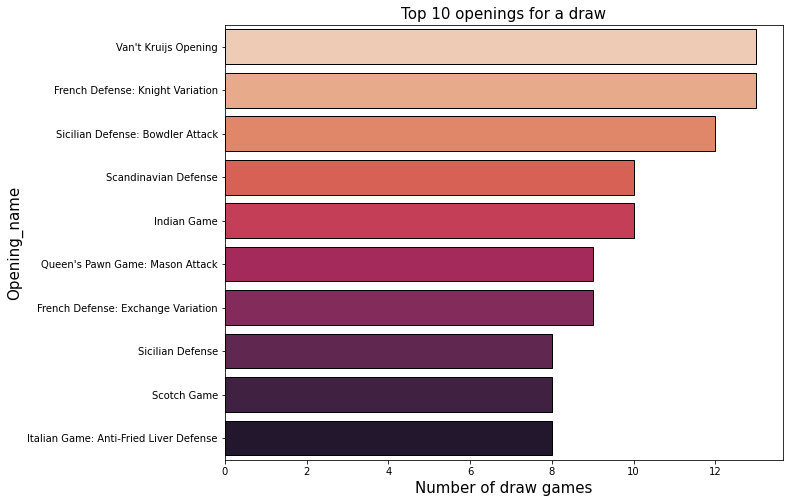

In [16]:
## Creating a  Bar Plot  ##
plt.figure(figsize=(10,8))
plt.title('Top 10 openings for a draw.')
white_winning_plot = sns.barplot(y=draw_win.opening_name[:10],x=draw_win.wins[:10], palette = "rocket_r",edgecolor='black')
plt.ylabel("Opening_name", fontsize=15)
plt.yticks(fontsize=10)
plt.xlabel("Number of draw games", fontsize=15)
plt.title("Top 10 openings for a draw",fontsize=15)

#### <font color=darkgreen>**Observation:**</font> <font color=black>**Van't Kruijs Opening has highest probaility to draw. This opening gives a advantage for black as well as for a draw also.**</font>


### <font color=darkblue>**4.Type of winning for white?**</font>

Text(0.5, 1.0, 'Type of winning for white')

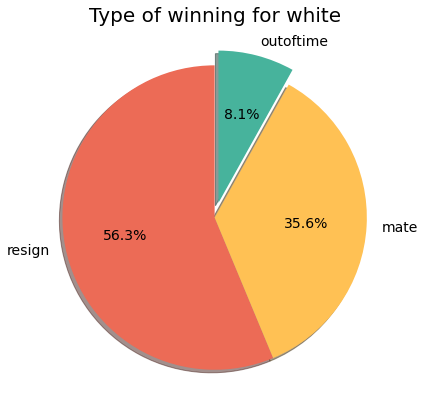

In [17]:
white=rated[rated["winner"]=="white"]
winning_type=white.victory_status.value_counts()
labels= winning_type.index  # x ticks
sizes= winning_type.values
## Create Pie chart Plot ##
plt.figure(figsize = (7,7))
explode = [0,0,0.1]
colors = ['#EC6B56','#FFC154','#47B39C']
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True,textprops={'fontsize': 14}, startangle=90, colors=colors)
plt.title('Type of winning for white',color = 'Black',fontsize = 20)

### <font color=darkgreen>**Observation:**</font> <font color=black>**White is likely to win the game by opponent resiging the game.**</font>

### <font color=darkblue>**5.Type of winning for Black?**</font>

Text(0.5, 1.0, 'Type of winning for Black')

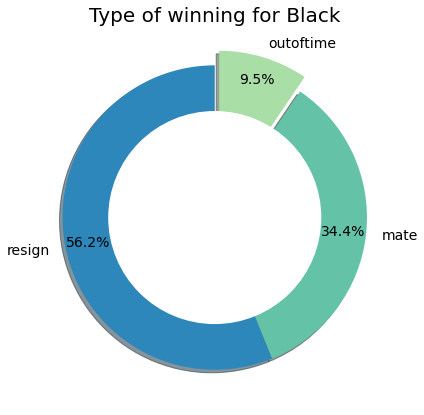

In [18]:
black=rated[rated["winner"]=="black"]
winning_type=black.victory_status.value_counts()
labels= winning_type.index  # x ticks
sizes= winning_type.values

## Create Pie chart Plot ##
plt.figure(figsize = (7,7))
explode = [0,0,0.1]
colors = ['#2D87BB','#64C2A6','#AADEA7']
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True,textprops={'fontsize': 14},pctdistance=0.85,startangle=90, colors=colors)
#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.title('Type of winning for Black',color = 'Black',fontsize = 20)

#### <font color=darkgreen>**Observation:**</font> <font color=black>**Black is likely to win the game by oppenent resiging the game.**</font>

### <font color=darkblue>**6.How are number of turns related to ratings difference of players?**</font>

<Figure size 1152x1152 with 0 Axes>

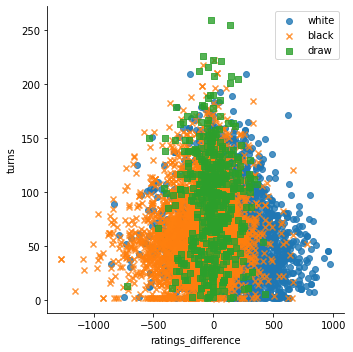

In [19]:
rated["ratings_difference"]=rated["white_rating"]-rated["black_rating"]
plt.figure(figsize=(16, 16))
sns.lmplot( y="turns", x="ratings_difference", data=rated, fit_reg=False, hue='winner',legend=False,markers=["o", "x", "s"],)
# Move the legend to an empty part of the plot
plt.legend(loc='upper right')
plt.show()

#### <font color=green>**Observation:**</font><font color=black>**Less difference between ratings leads to draw and more number of steps.**</font>

### <font color=darkblue>**7.How is difference of ratings related to victory type?**</font>


<Figure size 1152x1152 with 0 Axes>

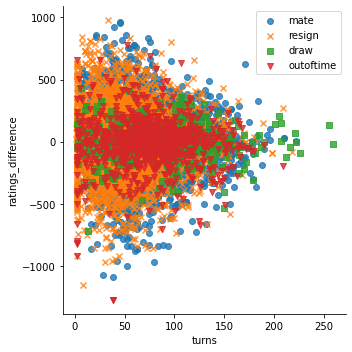

In [20]:
plt.figure(figsize=(16, 16))
sns.lmplot( x="turns", y="ratings_difference", data=rated, fit_reg=False, hue='victory_status',legend=False,markers=["o", "x", "s","v"])
# Move the legend to an empty part of the plot
plt.legend(loc='upper right')
plt.show()

#### <font color=green>**Observation:**</font><font color=black>**Less difference between ratings has led to winning the game by out of time.**</font>

### <font color=darkblue>**8.Top 10 openings to play against top rated players for black to win?**</font>

Text(0.5, 1.0, 'Top 10 openings for the black to win against top rated players')

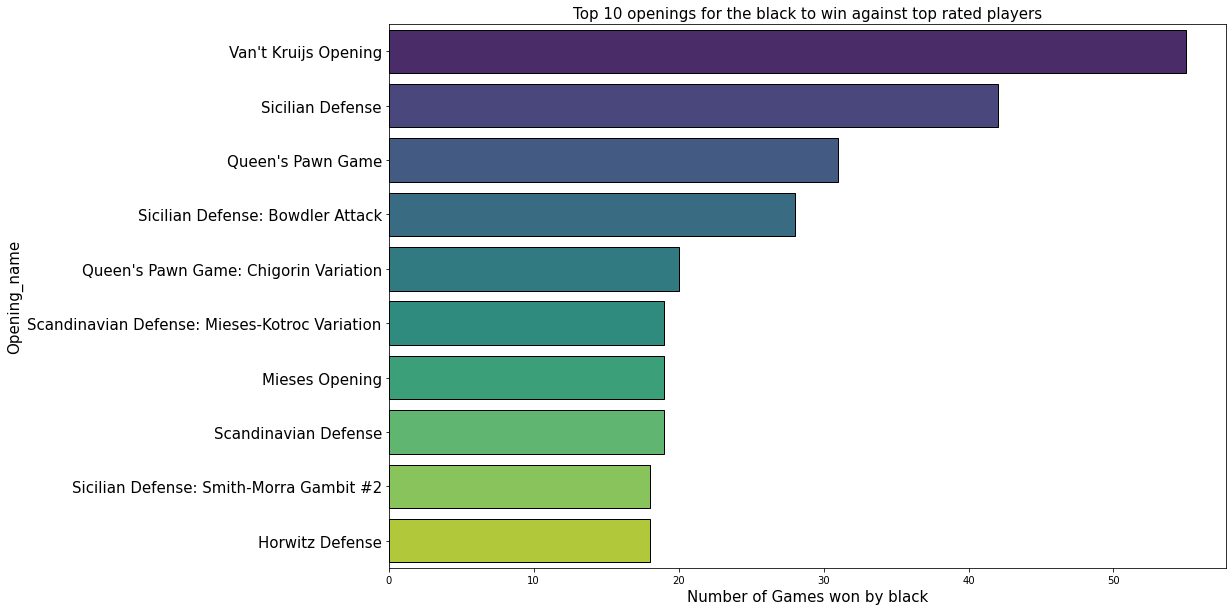

In [21]:
plt.figure(figsize=(15,10))
rated["ratings_difference"]=rated["ratings_difference"].abs()
df = rated.loc[rated['ratings_difference']>250]
blackWins = df.loc[df['winner']=='black']
mostWins = blackWins['opening_name'].value_counts().nlargest(10)
sns.barplot(y=mostWins.index, x=mostWins.values, palette = "viridis",edgecolor='black')
plt.ylabel("Opening_name", fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Number of Games won by black", fontsize=15)
plt.title("Top 10 openings for the black to win against top rated players",fontsize=15)

#### <font color=green>**Observation:**</font><font color=black>**For Black, Van't Kruijs Openings is preferrable to beat top rated players.**</font>

### <font color=darkblue>**9.Top 10 openings to play against top rated players for white to win?**</font>

Text(0.5, 1.0, 'Top 10 openings for the white to win against top rated players')

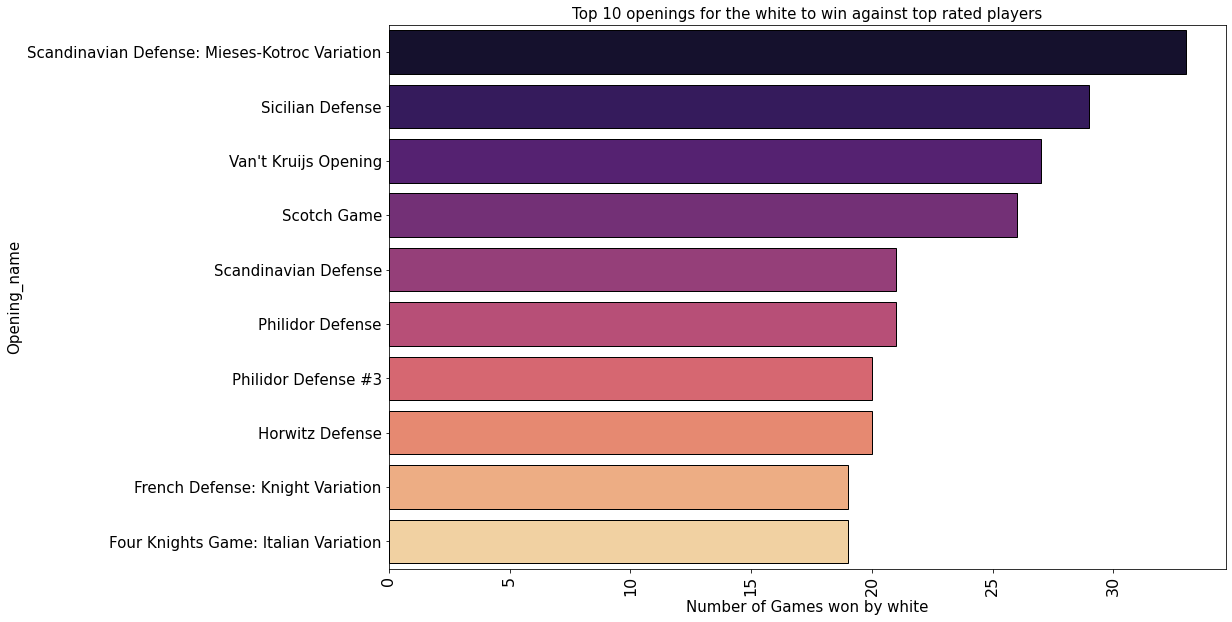

In [22]:
plt.figure(figsize=(15,10))
whiteWins = df.loc[df['winner']=='white']
mostWins = whiteWins['opening_name'].value_counts().nlargest(10)
sns.barplot(y=mostWins.index, x=mostWins.values, palette = "magma",edgecolor='black')
plt.xticks(rotation=90, fontsize=16)
plt.ylabel("Opening_name", fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Number of Games won by white", fontsize=15)
plt.title("Top 10 openings for the white to win against top rated players",fontsize=15)

#### <font color=green>**Observation:**</font><font color=black>**For White, Scandinavian Defense:Mieses-Kotroc Variation Openings is preferrable to beat top rated players.**</font>

### <font color=darkblue>**10.Top 10 openings for white to win game, if white rating is less than black rating?**</font>

Text(0.5, 1.0, 'Top 10 openings for the white to win against top rated players')

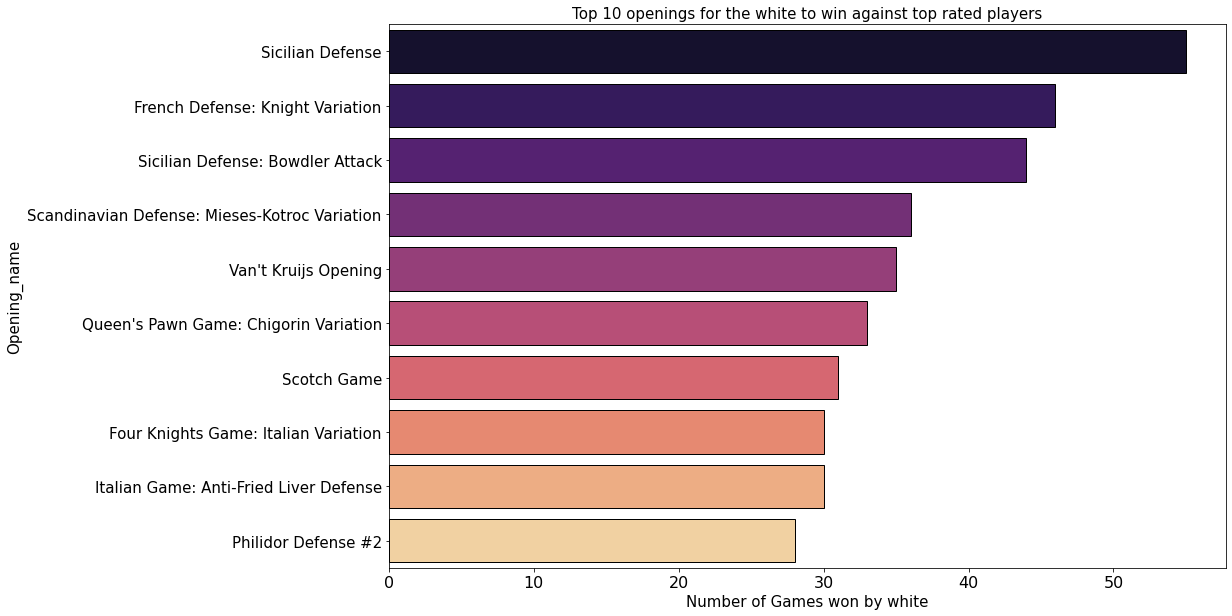

In [23]:
white_win=rated[(rated.winner=="white")&(rated.white_rating<rated.black_rating)]
whitewins=white_win.opening_name.value_counts().nlargest(10)
plt.figure(figsize=(15,10))
sns.barplot(y=whitewins.index, x=whitewins.values, palette = "magma",edgecolor='black')
plt.xticks(fontsize=16)
plt.ylabel("Opening_name", fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Number of Games won by white", fontsize=15)
plt.title("Top 10 openings for the white to win against top rated players",fontsize=15)

#### <font color=green>**Observation:**</font><font color=black>**For White,Sicilian Defense Opening is preferrable to beat high rated opponents.**</font>

### <font color=darkblue>**11.Top 10 openings for black to win game, if black rating is less than white rating?**</font>

Text(0.5, 1.0, 'Top 10 openings for the Black to win, if black rating is less than white rating')

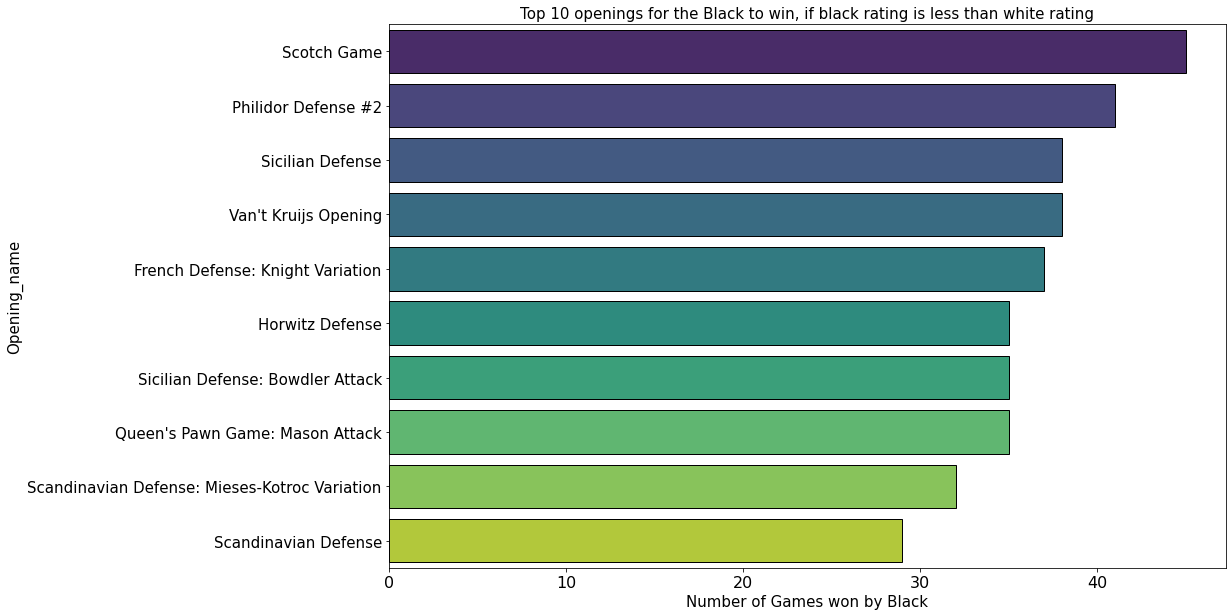

In [24]:
black_win=rated[(rated.winner=="black")&(rated.black_rating<rated.white_rating)]
blackwins=black_win.opening_name.value_counts().nlargest(10)
plt.figure(figsize=(15,10))
sns.barplot(y=blackwins.index, x=blackwins.values, palette = "viridis",edgecolor='black')
plt.xticks(fontsize=16)
plt.ylabel("Opening_name", fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel("Number of Games won by Black", fontsize=15)
plt.title("Top 10 openings for the Black to win, if black rating is less than white rating",fontsize=15)

#### <font color=green>**Observation:**</font><font color=black>**For Black,Scotch game Opening is preferrable to beat high rated opponents.**</font>